# Load Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import umap

import seaborn as sns

from sklearn.datasets import make_classification, make_blobs
from sklearn.decomposition import PCA
from sklearn import mixture
from sklearn.metrics.cluster import adjusted_rand_score as ari

#This needs to be initialized for UMAP repeatability
np.random.seed(15)

from sklearn.model_selection import train_test_split

import datetime

# Load UMAP-embedded Data

In [2]:
cc_list = ['cc_chestpain', 'cc_abdominalpain', 'cc_shortnessofbreath']
neighbor_list = [2, 15, 150] #Default is 15
min_dist_list = [0, 0.1, .25] #Default is 0.1
#metric_list = ['euclidean', 'mahalanobis'] #Default is 'euclidean'
metric_list = ['euclidean']

## Cluster Embeddings

In [10]:
def find_pairwise_ari(train_embedding, test_embedding, clust_range=range(2,20)):
    test_size = test_embedding[0].shape[0]
    
    mean_ari = []
    #std_ari = []
    min_n_clusters_found = []
    
    #mean_max_cluster_size = []
    max_cluster_diff = []
    #mean_max_cluster_stdv = []
    #mean_min_cluster_stdv = []
    #mean_cluster_variance = []
    
    r_list = []
    
    for n_components in clust_range:
        pred_labels = []
        label_counts = []
        for train, test in zip(train_embedding, test_embedding):
            gmm = mixture.GaussianMixture(n_components=n_components, random_state=17)
            gmm.fit(train)
            pred_labels.append(gmm.predict(test))
            
            #The -np.sort(-foo) quickly returns foo sorted largest to smallest
            #np.unique(foo, return_counts=True)[1] returns counts of each individual unique value of foo,
            #ignoring *what* those values are.
            #The counts/unbuffered counts ensure the final array has n_components values, to account for
            #empty clusters
            
            #counts = np.zeros(n_components)
            #unbuffered_counts = -np.sort(-np.unique(pred_labels[-1], return_counts=True)[1])
            #counts[:unbuffered_counts.shape[0]] = unbuffered_counts/test_size
            #label_counts.append(counts)
            
            #replacing above with:
            label_counts.append(np.unique(pred_labels[-1]).shape[0])
            
        pairwise_ari_vals = []
        for i in range(len(pred_labels)):
            for j in range(i):
                pairwise_ari_vals.append(ari(pred_labels[i], pred_labels[j]))
        mean_ari.append(np.mean(pairwise_ari_vals))
        min_n_clusters_found.append(np.mean(label_counts))
        #std_ari.append(np.std(pairwise_ari_vals))
        
        #label_counts = np.array(label_counts)
        
        '''r = np.divide(
            (label_counts - label_counts.mean(axis=0)),
            label_counts.std(axis=0),
            out=np.zeros_like(label_counts),
            where=label_counts.std(axis=0)!=0
                     )'''
        
        #r = (label_counts - label_counts.mean(axis=0))/label_counts.std(axis=0)
        #r_list.append(np.max(r.max(axis=0) - r.min(axis=0)))
        
        #cluster_size_ranges = label_counts.max(axis=0) - label_counts.min(axis=0)
        #print(f'Found clusters  of size {label_counts.max(axis=0)} and {label_counts.min(axis=0)} with range of {cluster_size_ranges}')
        #max_cluster_diff.append(np.max(cluster_size_ranges)*n_components)
        
        #mean_max_cluster_size.append(label_counts.mean(axis=0)[0])
        #mean_max_cluster_stdv.append(label_counts.std(axis=0)[0])
        #mean_min_cluster_stdv.append(label_counts.std(axis=0)[-1])
        #mean_cluster_variance.append(label_counts.std(axis=0).mean())
        
        
    returned_ari = pd.DataFrame(index=clust_range)
    returned_ari['pairwise'] = mean_ari
    #returned_ari['std_ari'] = std_ari
    #returned_ari['max_size'] = mean_max_cluster_size
    #returned_ari['max_std'] = mean_max_cluster_stdv
    #returned_ari['min_std'] = mean_min_cluster_stdv
    #returned_ari['mean_std']  = mean_cluster_variance
    #returned_ari['max_cluster_range'] = max_cluster_diff
    returned_ari['small_n'] = min_n_clusters_found
    #returned_ari['r'] = r_list
    
    return returned_ari

In [4]:
cp_2_0_train = [np.genfromtxt(f'grid_search_data/chestpain_2_0_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
cp_2_0_test =  [np.genfromtxt(f'grid_search_data/chestpain_2_0_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]

cp_2_01_train = [np.genfromtxt(f'grid_search_data/chestpain_2_0.1_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
cp_2_01_test =  [np.genfromtxt(f'grid_search_data/chestpain_2_0.1_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]

cp_2_025_train = [np.genfromtxt(f'grid_search_data/chestpain_2_0.25_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
cp_2_025_test =  [np.genfromtxt(f'grid_search_data/chestpain_2_0.25_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]

cp_15_0_train = [np.genfromtxt(f'grid_search_data/chestpain_15_0_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
cp_15_0_test =  [np.genfromtxt(f'grid_search_data/chestpain_15_0_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]

cp_15_01_train = [np.genfromtxt(f'grid_search_data/chestpain_15_0.1_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
cp_15_01_test =  [np.genfromtxt(f'grid_search_data/chestpain_15_0.1_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]

cp_15_025_train = [np.genfromtxt(f'grid_search_data/chestpain_15_0.25_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
cp_15_025_test =  [np.genfromtxt(f'grid_search_data/chestpain_15_0.25_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]

cp_150_0_train = [np.genfromtxt(f'grid_search_data/chestpain_150_0_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
cp_150_0_test =  [np.genfromtxt(f'grid_search_data/chestpain_150_0_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]

cp_150_01_train = [np.genfromtxt(f'grid_search_data/chestpain_150_0.1_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
cp_150_01_test =  [np.genfromtxt(f'grid_search_data/chestpain_150_0.1_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]

cp_150_025_train = [np.genfromtxt(f'grid_search_data/chestpain_150_0.25_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
cp_150_025_test =  [np.genfromtxt(f'grid_search_data/chestpain_150_0.25_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]


In [ ]:
cp_2_0_ari = find_pairwise_ari(cp_2_0_train, cp_2_0_test)
cp_2_01_ari = find_pairwise_ari(cp_2_01_train, cp_2_01_test)
cp_2_025_ari = find_pairwise_ari(cp_2_025_train, cp_2_025_test)

cp_15_0_ari = find_pairwise_ari(cp_15_0_train, cp_15_0_test)
cp_15_01_ari = find_pairwise_ari(cp_15_01_train, cp_15_01_test)
cp_15_025_ari = find_pairwise_ari(cp_15_025_train, cp_15_025_test)

cp_150_0_ari = find_pairwise_ari(cp_150_0_train, cp_150_0_test)
cp_150_01_ari = find_pairwise_ari(cp_150_01_train, cp_150_01_test)

In [12]:
cp_150_025_ari = find_pairwise_ari(cp_150_025_train, cp_150_025_test)

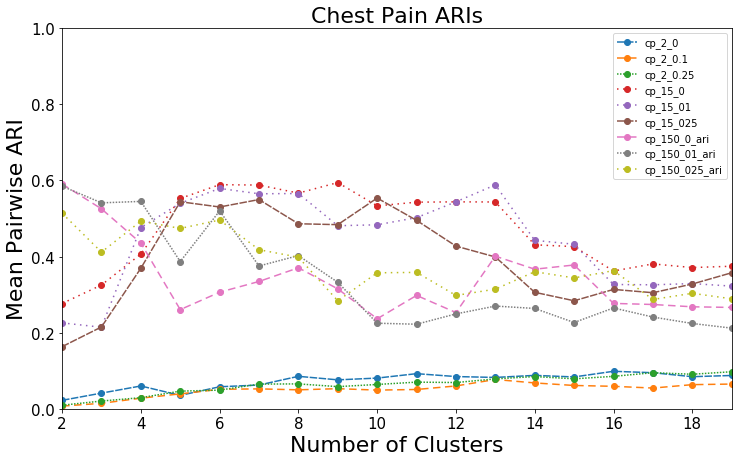

In [13]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax.plot(cp_2_0_ari.pairwise, 'o', linestyle=(0, (5, 1)), color='C0', label='cp_2_0')
ax.plot(cp_2_01_ari.pairwise, 'o', linestyle=(0, (5, 3)), color='C1', label='cp_2_0.1')
ax.plot(cp_2_025_ari.pairwise, 'o', linestyle=(0, (1, 1)), color='C2', label='cp_2_0.25')

ax.plot(cp_15_0_ari.pairwise    , 'o', linestyle=(0, (1, 3)),  color='C3', label='cp_15_0')
ax.plot(cp_15_01_ari.pairwise    , 'o', linestyle=(0, (1, 3)),  color='C4', label='cp_15_01')
ax.plot(cp_15_025_ari.pairwise, 'o', linestyle=(0, (5, 1)), color='C5', label='cp_15_025')


ax.plot(cp_150_0_ari.pairwise, 'o', linestyle=(0, (5, 3)), color='C6', label='cp_150_0_ari')
ax.plot(cp_150_01_ari.pairwise, 'o', linestyle=(0, (1, 1)), color='C7', label='cp_150_01_ari')
ax.plot(cp_150_025_ari.pairwise    , 'o', linestyle=(0, (1, 3)),  color='C8', label='cp_150_025_ari')

#ax.axvline(10, label='True Cluster Number', color='C3')

ax.set_xlim(2,19)
ax.set_ylim(0,1)
ax.set_ylabel('Mean Pairwise ARI' , fontsize=22)
ax.set_xlabel('Number of Clusters', fontsize=22)

ax.tick_params(axis='both', labelsize=15)

ax.set_title(f'Chest Pain ARIs', fontsize = 22)

ax.legend()

In [18]:
cp_15_0_ari[np.round(cp_15_0_ari.small_n) >= np.arange(2,20)]

,pairwise,small_n
2,0.276716,2.0
3,0.325344,3.0
4,0.406581,4.0
5,0.552789,4.8
6,0.589003,5.6


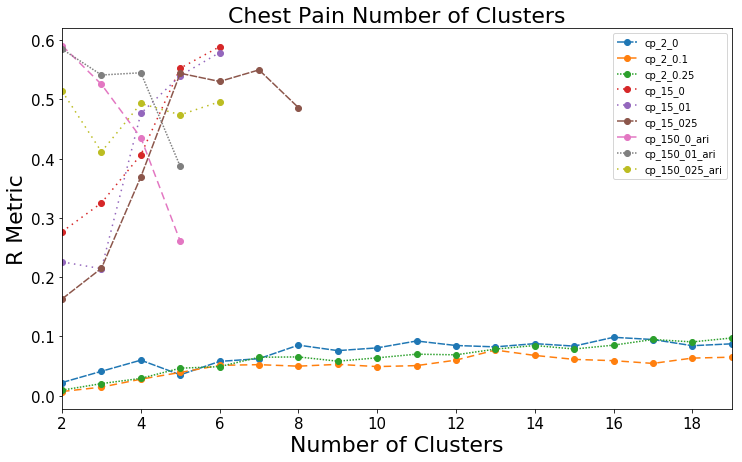

In [19]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax.plot(cp_2_0_ari[np.round(cp_2_0_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 1)), color='C0', label='cp_2_0')
ax.plot(cp_2_01_ari[np.round(cp_2_01_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 3)), color='C1', label='cp_2_0.1')
ax.plot(cp_2_025_ari[np.round(cp_2_025_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (1, 1)), color='C2', label='cp_2_0.25')

ax.plot(cp_15_0_ari[np.round(cp_15_0_ari.small_n) == np.arange(2,20)].pairwise,   'o', linestyle=(0, (1, 3)),  color='C3', label='cp_15_0')
ax.plot(cp_15_01_ari[np.round(cp_15_01_ari.small_n) == np.arange(2,20)].pairwise,  'o', linestyle=(0, (1, 3)),  color='C4', label='cp_15_01')
ax.plot(cp_15_025_ari[np.round(cp_15_025_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 1)), color='C5', label='cp_15_025')


ax.plot(cp_150_0_ari[np.round(cp_150_0_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 3)), color='C6', label='cp_150_0_ari')
ax.plot(cp_150_01_ari[np.round(cp_150_01_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (1, 1)), color='C7', label='cp_150_01_ari')
ax.plot(cp_150_025_ari[np.round(cp_150_025_ari.small_n) == np.arange(2,20)].pairwise,    'o', linestyle=(0, (1, 3)),  color='C8', label='cp_150_025_ari')

#ax.axvline(10, label='True Cluster Number', color='C3')

ax.set_xlim(2,19)
#ax.set_ylim(0,1)
ax.set_ylabel('R Metric' , fontsize=22)
ax.set_xlabel('Number of Clusters', fontsize=22)

ax.tick_params(axis='both', labelsize=15)

ax.set_title(f'Chest Pain Number of Clusters', fontsize = 22)

ax.legend()

In [41]:
cp_15_0_ari

,pairwise,small_n
2,0.276716,2.0
3,0.325344,3.0
4,0.406581,4.0
5,0.552789,4.8
6,0.589003,5.6
7,0.587978,5.8
8,0.566819,6.8
9,0.594524,7.8
10,0.533292,8.6
11,0.543022,8.8


# SOB

In [20]:
sob_2_0_train = [np.genfromtxt(f'grid_search_data/shortnessofbreath_2_0_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
sob_2_0_test =  [np.genfromtxt(f'grid_search_data/shortnessofbreath_2_0_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]

sob_2_01_train = [np.genfromtxt(f'grid_search_data/shortnessofbreath_2_0.1_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
sob_2_01_test =  [np.genfromtxt(f'grid_search_data/shortnessofbreath_2_0.1_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]

sob_2_025_train = [np.genfromtxt(f'grid_search_data/shortnessofbreath_2_0.25_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
sob_2_025_test =  [np.genfromtxt(f'grid_search_data/shortnessofbreath_2_0.25_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]

sob_15_0_train = [np.genfromtxt(f'grid_search_data/shortnessofbreath_15_0_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
sob_15_0_test =  [np.genfromtxt(f'grid_search_data/shortnessofbreath_15_0_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]

sob_15_01_train = [np.genfromtxt(f'grid_search_data/shortnessofbreath_15_0.1_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
sob_15_01_test =  [np.genfromtxt(f'grid_search_data/shortnessofbreath_15_0.1_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]

sob_15_025_train = [np.genfromtxt(f'grid_search_data/shortnessofbreath_15_0.25_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
sob_15_025_test =  [np.genfromtxt(f'grid_search_data/shortnessofbreath_15_0.25_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]

sob_150_0_train = [np.genfromtxt(f'grid_search_data/shortnessofbreath_150_0_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
sob_150_0_test =  [np.genfromtxt(f'grid_search_data/shortnessofbreath_150_0_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]

sob_150_01_train = [np.genfromtxt(f'grid_search_data/shortnessofbreath_150_0.1_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
sob_150_01_test =  [np.genfromtxt(f'grid_search_data/shortnessofbreath_150_0.1_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]

sob_150_025_train = [np.genfromtxt(f'grid_search_data/shortnessofbreath_150_0.25_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
sob_150_025_test =  [np.genfromtxt(f'grid_search_data/shortnessofbreath_150_0.25_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]


In [21]:
sob_2_0_ari = find_pairwise_ari(sob_2_0_train, sob_2_0_test)
sob_2_01_ari = find_pairwise_ari(sob_2_01_train, sob_2_01_test)
sob_2_025_ari = find_pairwise_ari(sob_2_025_train, sob_2_025_test)

sob_15_0_ari = find_pairwise_ari(sob_15_0_train, sob_150_0_test)
sob_15_01_ari = find_pairwise_ari(sob_15_01_train, sob_15_01_test)
sob_15_025_ari = find_pairwise_ari(sob_15_025_train, sob_15_025_test)

sob_150_0_ari = find_pairwise_ari(sob_150_0_train, sob_150_0_test)
sob_150_01_ari = find_pairwise_ari(sob_150_01_train, sob_150_01_test)
sob_150_025_ari = find_pairwise_ari(sob_150_025_train, sob_150_025_test)

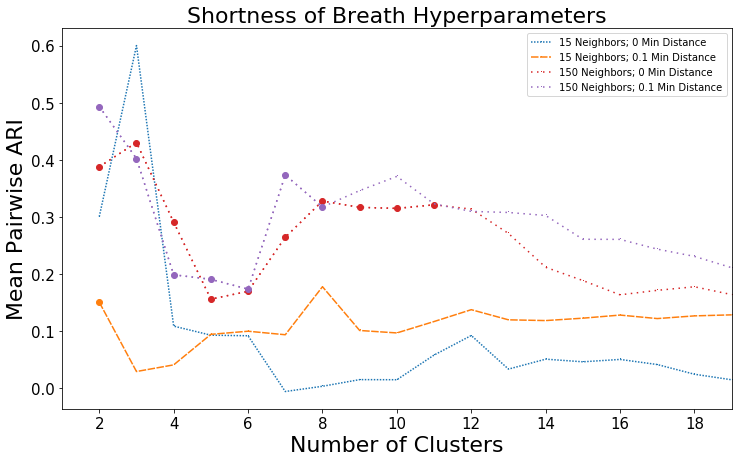

In [58]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

#ax.plot(sob_2_0_ari.pairwise, 'o', linestyle=(0, (1, 1)), color='C6',   label='sob_2_0_ari')
#ax.plot(sob_2_01_ari.pairwise, 'o', linestyle=(0, (5, 1)), color='C7',  label='sob_2_01_ari')
#ax.plot(sob_2_025_ari.pairwise, 'o', linestyle=(0, (5, 3)), color='C8', label='sob_2_025_ari')

ax.plot(sob_15_0_ari.pairwise, ',',
        linestyle=(0, (1, 1)), color='C0',
        label='15 Neighbors; 0 Min Distance')
ax.plot(sob_15_0_ari[np.round(sob_15_0_ari.small_n ) == np.arange(2,20)].pairwise, 'o',
        linestyle=(0, (1, 1)), color='C0',
        label='_nolegend_')

ax.plot(sob_15_01_ari.pairwise, ',',
        linestyle=(0, (5, 1)), color='C1', 
        label='15 Neighbors; 0.1 Min Distance')
ax.plot(sob_15_01_ari[np.round(sob_15_01_ari.small_n ) == np.arange(2,20)].pairwise,  'o',
        linestyle=(0, (5, 1)), color='C1', 
        label='_nolegend_')
#ax.plot(sob_15_025_ari.pairwise, 'o', linestyle=(0, (5, 3)), color='C2', label='15 Neighbors; 0.25 Min Distance')


ax.plot(sob_150_0_ari.pairwise    , ',',
        linestyle=(0, (1, 3)),  color='C3', 
        label='150 Neighbors; 0 Min Distance')
ax.plot(sob_150_0_ari[np.round(sob_150_0_ari.small_n ) == np.arange(2,20)].pairwise, 'o',
        linestyle=(0, (1, 3)),  color='C3', 
        label='_nolegend_')

ax.plot(sob_150_01_ari.pairwise    , ',',
        linestyle=(0, (1, 3)),  color='C4',
        label='150 Neighbors; 0.1 Min Distance')
ax.plot(sob_150_01_ari[np.round(sob_150_01_ari.small_n ) == np.arange(2,20)].pairwise, 'o',
        linestyle=(0, (1, 3)),  color='C4',
        label='_nolegend_')
#ax.plot(sob_150_025_ari.pairwise, 'o', linestyle=(0, (5, 1)), color='C5',     label='150 Neighbors; 0.25 Min Distance')


#ax.axvline(10, label='True Cluster Number', color='C3')

ax.set_xlim(1,19)
#ax.set_ylim(0,1)
ax.set_ylabel('Mean Pairwise ARI' , fontsize=22)
ax.set_xlabel('Number of Clusters', fontsize=22)

ax.tick_params(axis='both', labelsize=15)

ax.set_title(f'Shortness of Breath Hyperparameters', fontsize = 22)

ax.legend()

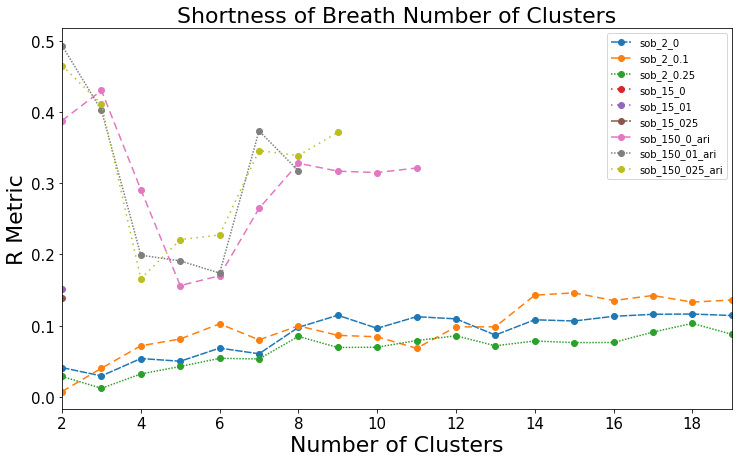

In [29]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax.plot(sob_2_0_ari[np.round(sob_2_0_ari.small_n ) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 1)), color='C0', label='sob_2_0')
ax.plot(sob_2_01_ari[np.round(sob_2_01_ari.small_n ) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 3)), color='C1', label='sob_2_0.1')
ax.plot(sob_2_025_ari[np.round(sob_2_025_ari.small_n ) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (1, 1)), color='C2', label='sob_2_0.25')

ax.plot(sob_15_0_ari[np.round(sob_15_0_ari.small_n ) == np.arange(2,20)].pairwise,   'o', linestyle=(0, (1, 3)),  color='C3', label='sob_15_0')
ax.plot(sob_15_01_ari[np.round(sob_15_01_ari.small_n ) == np.arange(2,20)].pairwise,  'o', linestyle=(0, (1, 3)),  color='C4', label='sob_15_01')
ax.plot(sob_15_025_ari[np.round(sob_15_025_ari.small_n ) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 1)), color='C5', label='sob_15_025')


ax.plot(sob_150_0_ari[np.round(sob_150_0_ari.small_n ) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 3)), color='C6', label='sob_150_0_ari')
ax.plot(sob_150_01_ari[np.round(sob_150_01_ari.small_n ) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (1, 1)), color='C7', label='sob_150_01_ari')
ax.plot(sob_150_025_ari[np.round(sob_150_025_ari.small_n ) == np.arange(2,20)].pairwise,    'o', linestyle=(0, (1, 3)),  color='C8', label='sob_150_025_ari')

#ax.axvline(10, label='True Cluster Number', color='C3')

ax.set_xlim(2,19)
#ax.set_ylim(0,1)
ax.set_ylabel('R Metric' , fontsize=22)
ax.set_xlabel('Number of Clusters', fontsize=22)

ax.tick_params(axis='both', labelsize=15)

ax.set_title(f'Shortness of Breath Number of Clusters', fontsize = 22)

ax.legend()

In [60]:
sob_150_01_ari

,pairwise,small_n
2,0.493355,1.8
3,0.402353,2.8
4,0.198962,3.8
5,0.190974,4.8
6,0.173773,5.8
7,0.373582,6.8
8,0.317531,7.6
9,0.346259,8.4
10,0.371117,9.4
11,0.322972,10.2


# Abd Pain

In [31]:
abd_2_0_train = [np.genfromtxt(f'grid_search_data/abdominalpain_2_0_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_2_0_test =  [np.genfromtxt(f'grid_search_data/abdominalpain_2_0_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_2_0_ari = find_pairwise_ari(abd_2_0_train, abd_2_0_test)

abd_2_01_train = [np.genfromtxt(f'grid_search_data/abdominalpain_2_0.1_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_2_01_test =  [np.genfromtxt(f'grid_search_data/abdominalpain_2_0.1_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_2_01_ari = find_pairwise_ari(abd_2_01_train, abd_2_01_test)

abd_2_025_train = [np.genfromtxt(f'grid_search_data/abdominalpain_2_0.25_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_2_025_test =  [np.genfromtxt(f'grid_search_data/abdominalpain_2_0.25_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_2_025_ari = find_pairwise_ari(abd_2_025_train, abd_2_025_test)

abd_15_0_train = [np.genfromtxt(f'grid_search_data/abdominalpain_15_0_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_15_0_test =  [np.genfromtxt(f'grid_search_data/abdominalpain_15_0_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_15_0_ari = find_pairwise_ari(abd_15_0_train, abd_15_0_test)

abd_15_01_train = [np.genfromtxt(f'grid_search_data/abdominalpain_15_0.1_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_15_01_test =  [np.genfromtxt(f'grid_search_data/abdominalpain_15_0.1_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_15_01_ari = find_pairwise_ari(abd_15_01_train, abd_15_01_test)

abd_15_025_train = [np.genfromtxt(f'grid_search_data/abdominalpain_15_0.25_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_15_025_test =  [np.genfromtxt(f'grid_search_data/abdominalpain_15_0.25_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_15_025_ari = find_pairwise_ari(abd_15_025_train, abd_15_025_test)

abd_150_0_train = [np.genfromtxt(f'grid_search_data/abdominalpain_150_0_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_150_0_test =  [np.genfromtxt(f'grid_search_data/abdominalpain_150_0_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_150_0_ari = find_pairwise_ari(abd_150_0_train, abd_150_0_test)

abd_150_01_train = [np.genfromtxt(f'grid_search_data/abdominalpain_150_0.1_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_150_01_test =  [np.genfromtxt(f'grid_search_data/abdominalpain_150_0.1_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_150_01_ari = find_pairwise_ari(abd_150_01_train, abd_150_01_test)

abd_150_025_train = [np.genfromtxt(f'grid_search_data/abdominalpain_150_0.25_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_150_025_test =  [np.genfromtxt(f'grid_search_data/abdominalpain_150_0.25_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
abd_150_025_ari = find_pairwise_ari(abd_150_025_train, abd_150_025_test)

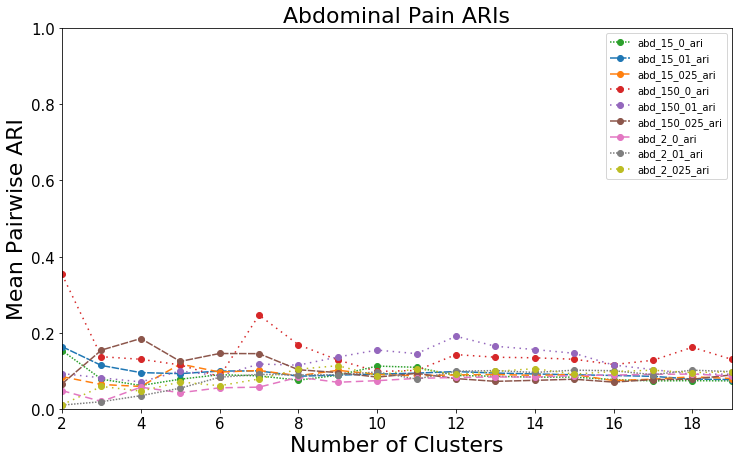

In [32]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax.plot(abd_15_0_ari.pairwise, 'o', linestyle=(0, (1, 1)), color='C2', label='abd_15_0_ari')
ax.plot(abd_15_01_ari.pairwise, 'o', linestyle=(0, (5, 1)), color='C0', label='abd_15_01_ari')
ax.plot(abd_15_025_ari.pairwise, 'o', linestyle=(0, (5, 3)), color='C1', label='abd_15_025_ari')

ax.plot(abd_150_0_ari.pairwise    , 'o', linestyle=(0, (1, 3)),  color='C3', label='abd_150_0_ari')
ax.plot(abd_150_01_ari.pairwise    , 'o', linestyle=(0, (1, 3)),  color='C4', label='abd_150_01_ari')
ax.plot(abd_150_025_ari.pairwise, 'o', linestyle=(0, (5, 1)), color='C5', label='abd_150_025_ari')

ax.plot(abd_2_0_ari.pairwise, 'o', linestyle=(0, (5, 3)), color='C6', label='abd_2_0_ari')
ax.plot(abd_2_01_ari.pairwise, 'o', linestyle=(0, (1, 1)), color='C7', label='abd_2_01_ari')
ax.plot(abd_2_025_ari.pairwise    , 'o', linestyle=(0, (1, 3)),  color='C8', label='abd_2_025_ari')

#ax.axvline(10, label='True Cluster Number', color='C3')

ax.set_xlim(2,19)
ax.set_ylim(0,1)
ax.set_ylabel('Mean Pairwise ARI' , fontsize=22)
ax.set_xlabel('Number of Clusters', fontsize=22)

ax.tick_params(axis='both', labelsize=15)

ax.set_title(f'Abdominal Pain ARIs', fontsize = 22)

ax.legend()

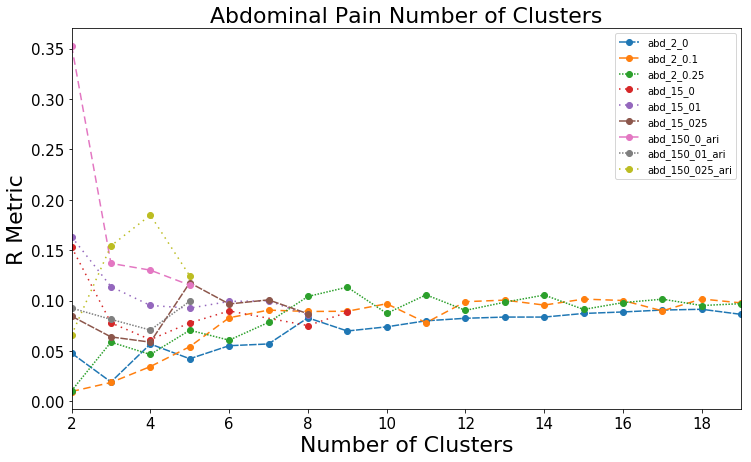

In [33]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax.plot(abd_2_0_ari[np.round(abd_2_0_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 1)), color='C0', label='abd_2_0')
ax.plot(abd_2_01_ari[np.round(abd_2_01_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 3)), color='C1', label='abd_2_0.1')
ax.plot(abd_2_025_ari[np.round(abd_2_025_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (1, 1)), color='C2', label='abd_2_0.25')

ax.plot(abd_15_0_ari[np.round(abd_15_0_ari.small_n) == np.arange(2,20)].pairwise,   'o', linestyle=(0, (1, 3)),  color='C3', label='abd_15_0')
ax.plot(abd_15_01_ari[np.round(abd_15_01_ari.small_n) == np.arange(2,20)].pairwise,  'o', linestyle=(0, (1, 3)),  color='C4', label='abd_15_01')
ax.plot(abd_15_025_ari[np.round(abd_15_025_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 1)), color='C5', label='abd_15_025')


ax.plot(abd_150_0_ari[np.round(abd_150_0_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 3)), color='C6', label='abd_150_0_ari')
ax.plot(abd_150_01_ari[np.round(abd_150_01_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (1, 1)), color='C7', label='abd_150_01_ari')
ax.plot(abd_150_025_ari[np.round(abd_150_025_ari.small_n) == np.arange(2,20)].pairwise,    'o', linestyle=(0, (1, 3)),  color='C8', label='abd_150_025_ari')

#ax.axvline(10, label='True Cluster Number', color='C3')

ax.set_xlim(2,19)
#ax.set_ylim(0,1)
ax.set_ylabel('R Metric' , fontsize=22)
ax.set_xlabel('Number of Clusters', fontsize=22)

ax.tick_params(axis='both', labelsize=15)

ax.set_title(f'Abdominal Pain Number of Clusters', fontsize = 22)

ax.legend()

In [43]:
abd_150_0_ari

,pairwise,small_n
2,0.352964,2.0
3,0.136877,3.0
4,0.130144,4.0
5,0.115275,4.6
6,0.084639,5.4
7,0.246399,6.2
8,0.168302,7.2
9,0.128309,7.0
10,0.098167,8.2
11,0.100751,8.4


# Back Pain

In [34]:
back_2_0_train = [np.genfromtxt(f'grid_search_data/backpain_2_0_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_2_0_test =  [np.genfromtxt(f'grid_search_data/backpain_2_0_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_2_0_ari = find_pairwise_ari(back_2_0_train, back_2_0_test)

back_2_01_train = [np.genfromtxt(f'grid_search_data/backpain_2_0.1_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_2_01_test =  [np.genfromtxt(f'grid_search_data/backpain_2_0.1_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_2_01_ari = find_pairwise_ari(back_2_01_train, back_2_01_test)

back_2_025_train = [np.genfromtxt(f'grid_search_data/backpain_2_0.25_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_2_025_test =  [np.genfromtxt(f'grid_search_data/backpain_2_0.25_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_2_025_ari = find_pairwise_ari(back_2_025_train, back_2_025_test)

back_15_0_train = [np.genfromtxt(f'grid_search_data/backpain_15_0_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_15_0_test =  [np.genfromtxt(f'grid_search_data/backpain_15_0_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_15_0_ari = find_pairwise_ari(back_15_0_train, back_15_0_test)

back_15_01_train = [np.genfromtxt(f'grid_search_data/backpain_15_0.1_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_15_01_test =  [np.genfromtxt(f'grid_search_data/backpain_15_0.1_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_15_01_ari = find_pairwise_ari(back_15_01_train, back_15_01_test)

back_15_025_train = [np.genfromtxt(f'grid_search_data/backpain_15_0.25_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_15_025_test =  [np.genfromtxt(f'grid_search_data/backpain_15_0.25_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_15_025_ari = find_pairwise_ari(back_15_025_train, back_15_025_test)

back_150_0_train = [np.genfromtxt(f'grid_search_data/backpain_150_0_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_150_0_test =  [np.genfromtxt(f'grid_search_data/backpain_150_0_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_150_0_ari = find_pairwise_ari(back_150_0_train, back_150_0_test)

back_150_01_train = [np.genfromtxt(f'grid_search_data/backpain_150_0.1_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_150_01_test =  [np.genfromtxt(f'grid_search_data/backpain_150_0.1_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_150_01_ari = find_pairwise_ari(back_150_01_train, back_150_01_test)

back_150_025_train = [np.genfromtxt(f'grid_search_data/backpain_150_0.25_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_150_025_test =  [np.genfromtxt(f'grid_search_data/backpain_150_0.25_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
back_150_025_ari = find_pairwise_ari(back_150_025_train, back_150_025_test)

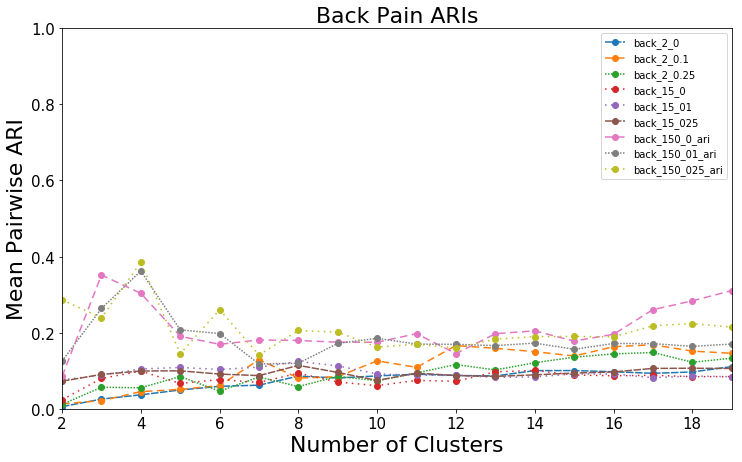

In [35]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax.plot(back_2_0_ari.pairwise, 'o', linestyle=(0, (5, 1)), color='C0', label='back_2_0')
ax.plot(back_2_01_ari.pairwise, 'o', linestyle=(0, (5, 3)), color='C1', label='back_2_0.1')
ax.plot(back_2_025_ari.pairwise, 'o', linestyle=(0, (1, 1)), color='C2', label='back_2_0.25')

ax.plot(back_15_0_ari.pairwise    , 'o', linestyle=(0, (1, 3)),  color='C3', label='back_15_0')
ax.plot(back_15_01_ari.pairwise    , 'o', linestyle=(0, (1, 3)),  color='C4', label='back_15_01')
ax.plot(back_15_025_ari.pairwise, 'o', linestyle=(0, (5, 1)), color='C5', label='back_15_025')


ax.plot(back_150_0_ari.pairwise, 'o', linestyle=(0, (5, 3)), color='C6', label='back_150_0_ari')
ax.plot(back_150_01_ari.pairwise, 'o', linestyle=(0, (1, 1)), color='C7', label='back_150_01_ari')
ax.plot(back_150_025_ari.pairwise    , 'o', linestyle=(0, (1, 3)),  color='C8', label='back_150_025_ari')

#ax.axvline(10, label='True Cluster Number', color='C3')

ax.set_xlim(2,19)
ax.set_ylim(0,1)
ax.set_ylabel('Mean Pairwise ARI' , fontsize=22)
ax.set_xlabel('Number of Clusters', fontsize=22)

ax.tick_params(axis='both', labelsize=15)

ax.set_title(f'Back Pain ARIs', fontsize = 22)

ax.legend()

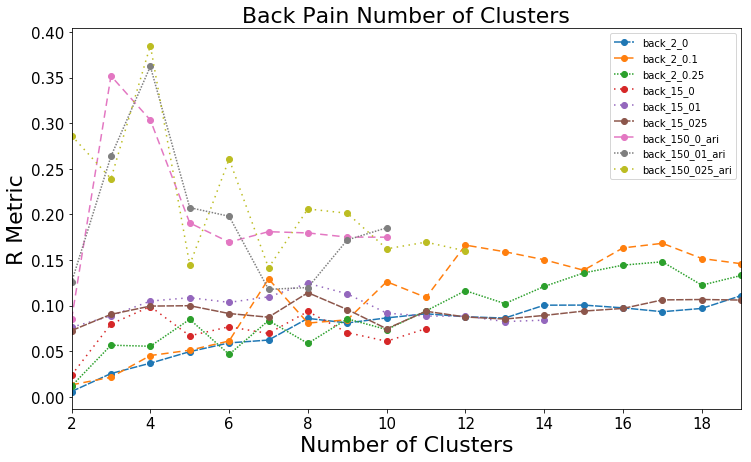

In [36]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax.plot(back_2_0_ari[np.round(back_2_0_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 1)), color='C0', label='back_2_0')
ax.plot(back_2_01_ari[np.round(back_2_01_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 3)), color='C1', label='back_2_0.1')
ax.plot(back_2_025_ari[np.round(back_2_025_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (1, 1)), color='C2', label='back_2_0.25')

ax.plot(back_15_0_ari[np.round(back_15_0_ari.small_n) == np.arange(2,20)].pairwise,   'o', linestyle=(0, (1, 3)),  color='C3', label='back_15_0')
ax.plot(back_15_01_ari[np.round(back_15_01_ari.small_n) == np.arange(2,20)].pairwise,  'o', linestyle=(0, (1, 3)),  color='C4', label='back_15_01')
ax.plot(back_15_025_ari[np.round(back_15_025_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 1)), color='C5', label='back_15_025')


ax.plot(back_150_0_ari[np.round(back_150_0_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 3)), color='C6', label='back_150_0_ari')
ax.plot(back_150_01_ari[np.round(back_150_01_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (1, 1)), color='C7', label='back_150_01_ari')
ax.plot(back_150_025_ari[np.round(back_150_025_ari.small_n) == np.arange(2,20)].pairwise,    'o', linestyle=(0, (1, 3)),  color='C8', label='back_150_025_ari')

#ax.axvline(10, label='True Cluster Number', color='C3')

ax.set_xlim(2,19)
#ax.set_ylim(0,1)
ax.set_ylabel('R Metric' , fontsize=22)
ax.set_xlabel('Number of Clusters', fontsize=22)

ax.tick_params(axis='both', labelsize=15)

ax.set_title(f'Back Pain Number of Clusters', fontsize = 22)

ax.legend()

In [44]:
back_150_025_ari

,pairwise,small_n
2,0.286300,2.0
3,0.239132,3.0
4,0.385032,4.0
5,0.144539,5.0
6,0.260548,6.0
7,0.141431,7.0
8,0.205901,8.0
9,0.201213,9.0
10,0.162186,10.0
11,0.169507,10.8


# Falls

In [37]:
fall_2_0_train = [np.genfromtxt(f'grid_search_data/fall_2_0_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_2_0_test =  [np.genfromtxt(f'grid_search_data/fall_2_0_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_2_0_ari = find_pairwise_ari(fall_2_0_train, fall_2_0_test)

fall_2_01_train = [np.genfromtxt(f'grid_search_data/fall_2_0.1_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_2_01_test =  [np.genfromtxt(f'grid_search_data/fall_2_0.1_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_2_01_ari = find_pairwise_ari(fall_2_01_train, fall_2_01_test)

fall_2_025_train = [np.genfromtxt(f'grid_search_data/fall_2_0.25_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_2_025_test =  [np.genfromtxt(f'grid_search_data/fall_2_0.25_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_2_025_ari = find_pairwise_ari(fall_2_025_train, fall_2_025_test)

fall_15_0_train = [np.genfromtxt(f'grid_search_data/fall_15_0_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_15_0_test =  [np.genfromtxt(f'grid_search_data/fall_15_0_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_15_0_ari = find_pairwise_ari(fall_15_0_train, fall_15_0_test)

fall_15_01_train = [np.genfromtxt(f'grid_search_data/fall_15_0.1_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_15_01_test =  [np.genfromtxt(f'grid_search_data/fall_15_0.1_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_15_01_ari = find_pairwise_ari(fall_15_01_train, fall_15_01_test)

fall_15_025_train = [np.genfromtxt(f'grid_search_data/fall_15_0.25_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_15_025_test =  [np.genfromtxt(f'grid_search_data/fall_15_0.25_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_15_025_ari = find_pairwise_ari(fall_15_025_train, fall_15_025_test)

fall_150_0_train = [np.genfromtxt(f'grid_search_data/fall_150_0_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_150_0_test =  [np.genfromtxt(f'grid_search_data/fall_150_0_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_150_0_ari = find_pairwise_ari(fall_150_0_train, fall_150_0_test)

fall_150_01_train = [np.genfromtxt(f'grid_search_data/fall_150_0.1_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_150_01_test =  [np.genfromtxt(f'grid_search_data/fall_150_0.1_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_150_01_ari = find_pairwise_ari(fall_150_01_train, fall_150_01_test)

fall_150_025_train = [np.genfromtxt(f'grid_search_data/fall_15_0.25_euclidean_train_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_150_025_test =  [np.genfromtxt(f'grid_search_data/fall_15_0.25_euclidean_test_embedding_fold_{i}.csv', delimiter=',') for i in range(5)]
fall_150_025_ari = find_pairwise_ari(fall_150_025_train, fall_150_025_test)

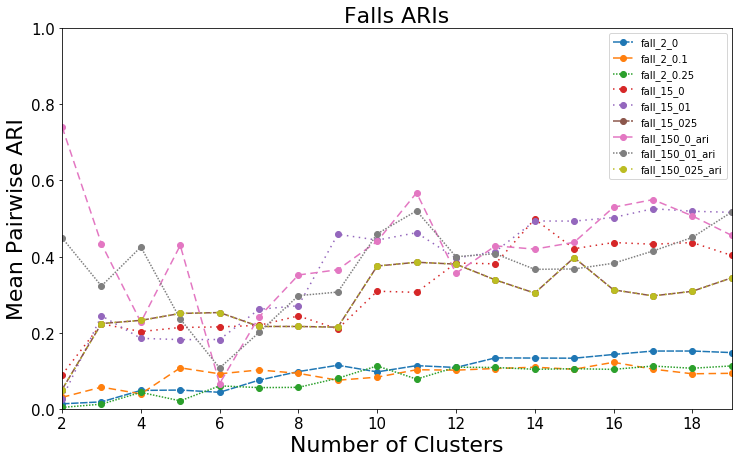

In [38]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax.plot(fall_2_0_ari.pairwise, 'o', linestyle=(0, (5, 1)), color='C0', label='fall_2_0')
ax.plot(fall_2_01_ari.pairwise, 'o', linestyle=(0, (5, 3)), color='C1', label='fall_2_0.1')
ax.plot(fall_2_025_ari.pairwise, 'o', linestyle=(0, (1, 1)), color='C2', label='fall_2_0.25')

ax.plot(fall_15_0_ari.pairwise    , 'o', linestyle=(0, (1, 3)),  color='C3', label='fall_15_0')
ax.plot(fall_15_01_ari.pairwise    , 'o', linestyle=(0, (1, 3)),  color='C4', label='fall_15_01')
ax.plot(fall_15_025_ari.pairwise, 'o', linestyle=(0, (5, 1)), color='C5', label='fall_15_025')


ax.plot(fall_150_0_ari.pairwise, 'o', linestyle=(0, (5, 3)), color='C6', label='fall_150_0_ari')
ax.plot(fall_150_01_ari.pairwise, 'o', linestyle=(0, (1, 1)), color='C7', label='fall_150_01_ari')
ax.plot(fall_150_025_ari.pairwise    , 'o', linestyle=(0, (1, 3)),  color='C8', label='fall_150_025_ari')

#ax.axvline(10, label='True Cluster Number', color='C3')

ax.set_xlim(2,19)
ax.set_ylim(0,1)
ax.set_ylabel('Mean Pairwise ARI' , fontsize=22)
ax.set_xlabel('Number of Clusters', fontsize=22)

ax.tick_params(axis='both', labelsize=15)

ax.set_title(f'Falls ARIs', fontsize = 22)

ax.legend()

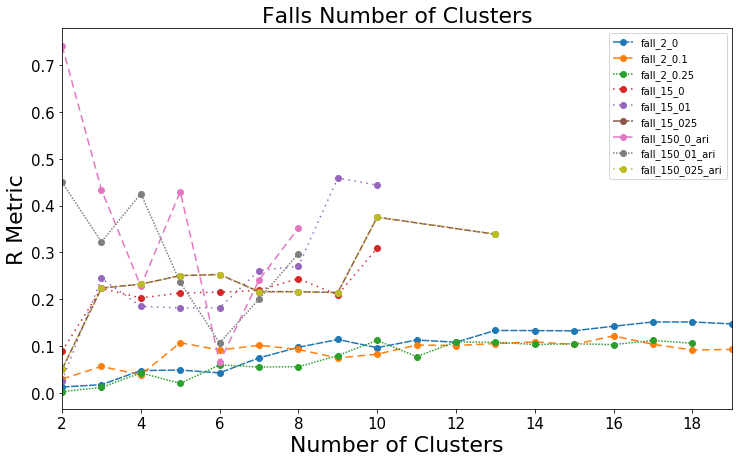

In [39]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax.plot(fall_2_0_ari[np.round(fall_2_0_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 1)), color='C0', label='fall_2_0')
ax.plot(fall_2_01_ari[np.round(fall_2_01_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 3)), color='C1', label='fall_2_0.1')
ax.plot(fall_2_025_ari[np.round(fall_2_025_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (1, 1)), color='C2', label='fall_2_0.25')

ax.plot(fall_15_0_ari[np.round(fall_15_0_ari.small_n) == np.arange(2,20)].pairwise,   'o', linestyle=(0, (1, 3)),  color='C3', label='fall_15_0')
ax.plot(fall_15_01_ari[np.round(fall_15_01_ari.small_n) == np.arange(2,20)].pairwise,  'o', linestyle=(0, (1, 3)),  color='C4', label='fall_15_01')
ax.plot(fall_15_025_ari[np.round(fall_15_025_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 1)), color='C5', label='fall_15_025')


ax.plot(fall_150_0_ari[np.round(fall_150_0_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (5, 3)), color='C6', label='fall_150_0_ari')
ax.plot(fall_150_01_ari[np.round(fall_150_01_ari.small_n) == np.arange(2,20)].pairwise, 'o', linestyle=(0, (1, 1)), color='C7', label='fall_150_01_ari')
ax.plot(fall_150_025_ari[np.round(fall_150_025_ari.small_n) == np.arange(2,20)].pairwise,    'o', linestyle=(0, (1, 3)),  color='C8', label='fall_150_025_ari')

#ax.axvline(10, label='True Cluster Number', color='C3')

ax.set_xlim(2,19)
#ax.set_ylim(0,1)
ax.set_ylabel('R Metric' , fontsize=22)
ax.set_xlabel('Number of Clusters', fontsize=22)

ax.tick_params(axis='both', labelsize=15)

ax.set_title(f'Falls Number of Clusters', fontsize = 22)

ax.legend()

In [45]:
fall_150_0_ari

,pairwise,small_n
2,0.740916,2.0
3,0.433487,3.0
4,0.227663,4.0
5,0.429484,5.0
6,0.066417,5.6
7,0.241282,7.0
8,0.351635,8.0
9,0.365456,8.4
10,0.440053,8.8
11,0.567676,9.6
